# first tutorial
fabian: https://pypsa-eur.readthedocs.io/en/latest/tutorial.html#how-to-customise-pypsa-eur

In [1]:
import pypsa
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [28]:
n = pypsa.Network("results/networks/elec_s_50_ec_lcopt_Co2-24H.nc")

INFO:pypsa.io:Imported network elec_s_50_ec_lcopt_Co2-24H.nc has buses, carriers, generators, lines, links, loads, stores


(<matplotlib.collections.PatchCollection at 0x7f2d5ac2d210>,
 <matplotlib.collections.LineCollection at 0x7f2d5acd2320>)

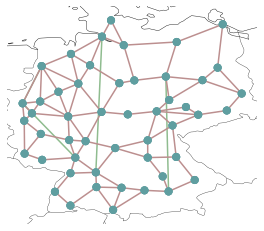

In [29]:
n.plot()

In [30]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 150 entries
Component 'Carrier' has 9 entries
Component 'Line' has 90 entries
Component 'LineType' has 32 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 204 entries
Component 'Load' has 50 entries
Component 'Generator' has 221 entries
Component 'Store' has 100 entries


temporal resolution

In [31]:
n.snapshots[:10]
len(n.snapshots)

31

static component data

In [32]:
n.lines.head()

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,build_year,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,DE0 0,DE0 10,2.318249,114.487532,Al/St 240/40 4-bundle 380.0,0.7,3396.205223,380.607223,True,3396.205223,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,DE0 0,DE0 29,3.975950,171.426634,Al/St 240/40 4-bundle 380.0,0.7,4534.545478,571.325302,True,4534.545478,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,DE0 0,DE0 37,2.000000,95.646574,Al/St 240/40 4-bundle 380.0,0.7,3396.205223,317.931874,True,3396.205223,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,DE0 0,DE0 42,4.000000,110.423667,Al/St 240/40 4-bundle 380.0,0.7,6792.410447,367.252379,True,6792.410447,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,DE0 1,DE0 12,5.000000,72.569983,Al/St 240/40 4-bundle 380.0,0.7,8490.513059,241.491305,True,8490.513059,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [33]:
n.generators.head()

,p_nom_max,weight,p_nom,capital_cost,p_nom_extendable,efficiency,carrier,bus,marginal_cost,control,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
DE0 0 CCGT,inf,0.000000,240.5,0.000000,False,0.50,CCGT,DE0 0,47.210167,Slack,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 OCGT,NaN,0.000000,0.0,4011.702475,True,0.39,OCGT,DE0 0,58.393694,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 onwind,1.143186e+04,2523.646701,0.0,9282.637388,True,1.00,onwind,DE0 0,0.024961,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 solar,8.946296e+03,1168.073204,0.0,4676.674559,True,1.00,solar,DE0 0,0.019082,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 1 CCGT,NaN,0.000000,499.0,0.000000,False,0.50,CCGT,DE0 1,47.210387,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [34]:
n.storage_units.head()

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,


In [35]:
n.loads.head()

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
DE0 0,DE0 0,,,0.0,0.0,-1.0
DE0 1,DE0 1,,,0.0,0.0,-1.0
DE0 10,DE0 10,,,0.0,0.0,-1.0
DE0 11,DE0 11,,,0.0,0.0,-1.0
DE0 12,DE0 12,,,0.0,0.0,-1.0


loads are empty as they are mostly time dependent.

time-varying component data

<AxesSubplot:xlabel='snapshot'>

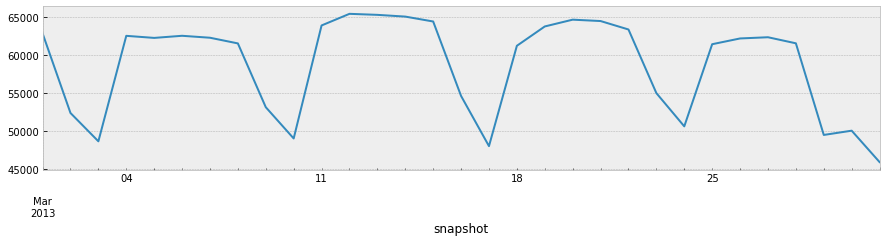

In [36]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))

In [37]:
n.generators_t.p_max_pu.head()

Generator,DE0 0 onwind,DE0 0 solar,DE0 1 onwind,DE0 1 solar,DE0 10 onwind,DE0 10 solar,DE0 11 offwind-ac,DE0 11 onwind,DE0 11 solar,DE0 12 onwind,...,DE0 5 onwind,DE0 5 solar,DE0 6 onwind,DE0 6 solar,DE0 7 onwind,DE0 7 solar,DE0 8 onwind,DE0 8 solar,DE0 9 onwind,DE0 9 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-03-01,0.158080,0.070157,0.039259,0.049750,0.125427,0.055319,0.352426,0.184212,0.136030,0.054440,...,0.182581,0.040473,0.104656,0.058077,0.000000,0.092655,0.037066,0.077660,0.252922,0.115200
2013-03-02,0.185961,0.179743,0.016542,0.146436,0.103808,0.176829,0.618607,0.365455,0.157868,0.029630,...,0.145262,0.123331,0.083106,0.193208,0.010984,0.153635,0.018568,0.178203,0.309211,0.169476
2013-03-03,0.267641,0.078711,0.033443,0.061971,0.189663,0.074391,0.404227,0.301550,0.139567,0.054751,...,0.297706,0.053279,0.136951,0.072490,0.024658,0.200927,0.030557,0.131108,0.360748,0.110220
2013-03-04,0.086487,0.183429,0.358396,0.207447,0.056001,0.188371,0.095436,0.111584,0.165411,0.220091,...,0.124217,0.198651,0.105687,0.193049,0.190403,0.215493,0.143906,0.217643,0.083738,0.185958
2013-03-05,0.139603,0.197621,0.231855,0.203787,0.091250,0.202719,0.264300,0.162022,0.193909,0.131980,...,0.409903,0.204336,0.098536,0.200900,0.104930,0.216200,0.017085,0.216700,0.199020,0.195033


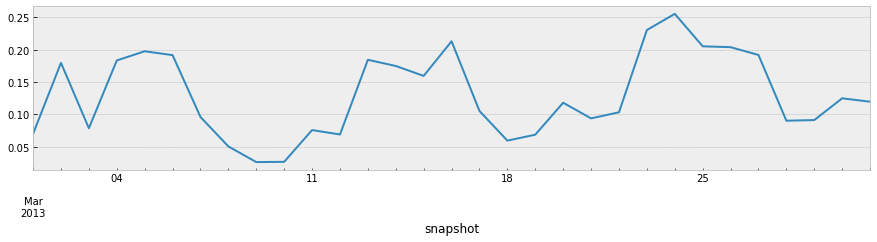

In [38]:
n.generators_t.p_max_pu.loc["2013-03","DE0 0 solar"].plot(figsize=(15,3));

total annual system costs (output data!)

In [39]:
n.objective / 1e9  #billion euros

1.4508542834158489

transmission line expansion

In [40]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5)

Line
1    5.404189e+02
2    2.217026e+03
3   -4.810549e-07
4    3.789046e-08
5    2.973629e-07
dtype: float64

Optimal Generator / Storage Capacities

In [41]:
n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 # get from MW to GW

carrier
CCGT          18.120910
OCGT           1.890473
coal          28.069380
offwind-ac     0.000000
offwind-dc     0.000000
onwind        34.693018
solar         90.798306
Name: p_nom_opt, dtype: float64

In [42]:
n.storage_units.groupby("carrier").p_nom_opt.sum() / 1e3 # get from MW to GW

Series([], Name: p_nom_opt, dtype: float64)

energy storage

<AxesSubplot:xlabel='snapshot'>

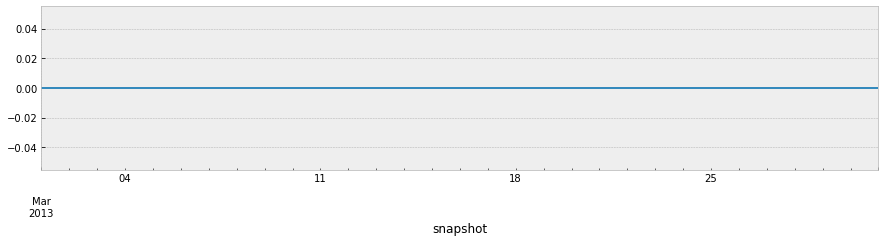

In [44]:
(n.storage_units_t.state_of_charge.sum(axis=1).resample('D').mean() / 1e6).plot(figsize=(15,3))

plotting networks

In [51]:
import cartopy.crs as ccrs

In [52]:
loading = (n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

In [ ]:
#platecarree,mercator, orthographic

/home/odaag/miniconda3/envs/pypsa-eur/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/odaag/miniconda3/envs/pypsa-eur/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


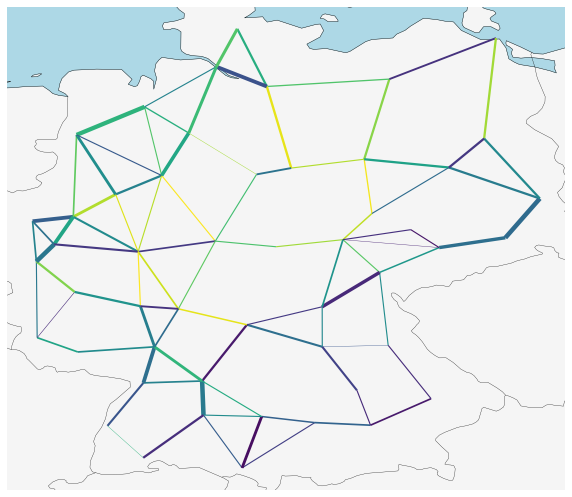

In [54]:
fig,ax = plt.subplots(
    figsize = (10,10),
    subplot_kw = {"projection": ccrs.PlateCarree()}
)

n.plot(ax=ax,
bus_colors='gray',
branch_components=["Line"],
line_widths=n.lines.s_nom_opt/3e3,
line_colors=loading,
line_cmap = plt.cm.viridis,
color_geomap=True,
bus_sizes=0)

ax.axis('off');